# Part 1: Data Importing & Exploratory Data Analysis






#### Importing Login Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/ultimate_challenge/logins.json'

import pandas as pd

logins = pd.read_json(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [3]:
print(logins.head())



           login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21


In [4]:
print(logins.columns)




Index(['login_time'], dtype='object')


In [5]:
print(type(logins))

<class 'pandas.core.frame.DataFrame'>


In [6]:

if isinstance(logins, pd.Series):
    logins = logins.to_frame(name='login_time')

print(logins.head())
print("Column names in logins DataFrame:", logins.columns)

if 'login_time' in logins.columns:
  logins['login_time'] = pd.to_datetime(logins['login_time'], errors='coerce')
  print("Converted 'login_time' to datetime.")
else:
  print("'login_time' still does not exist in logins.")

           login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21
Column names in logins DataFrame: Index(['login_time'], dtype='object')
Converted 'login_time' to datetime.


Summary: login_time column is currently a datetime object

In [7]:
if isinstance(logins, pd.DataFrame):
  print("logins is a DataFrame")
else:
  print("logins is not a DataFrame")

logins is a DataFrame


In [8]:
print("Column names in logins DataFrame:", logins.columns.tolist()
)

if 'login_time' in logins.columns:
  print("Column 'login_time' exists in logins DataFrame")
else:
  print("Column 'login_time' does not exist in logins DataFrame")

Column names in logins DataFrame: ['login_time']
Column 'login_time' exists in logins DataFrame


In [9]:
logins.info()

print(logins.head())
print(logins.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB
           login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21
               login_time
93137 1970-04-13 18:50:19
93138 1970-04-13 18:43:56
93139 1970-04-13 18:54:02
93140 1970-04-13 18:57:38
93141 1970-04-13 18:54:23


In [10]:
logins['login_time'] = pd.to_datetime(logins['login_time'])
logins.set_index('login_time', inplace=True)

logins_resampled = logins.resample('15T').size().reset_index(name='login_count')

logins_resampled.set_index('login_time', inplace=True)

print(logins_resampled)

print(logins_resampled.head())
print(logins_resampled.tail())

                     login_count
login_time                      
1970-01-01 20:00:00            2
1970-01-01 20:15:00            6
1970-01-01 20:30:00            9
1970-01-01 20:45:00            7
1970-01-01 21:00:00            1
...                          ...
1970-04-13 17:45:00            5
1970-04-13 18:00:00            5
1970-04-13 18:15:00            2
1970-04-13 18:30:00            7
1970-04-13 18:45:00            6

[9788 rows x 1 columns]
                     login_count
login_time                      
1970-01-01 20:00:00            2
1970-01-01 20:15:00            6
1970-01-01 20:30:00            9
1970-01-01 20:45:00            7
1970-01-01 21:00:00            1
                     login_count
login_time                      
1970-04-13 17:45:00            5
1970-04-13 18:00:00            5
1970-04-13 18:15:00            2
1970-04-13 18:30:00            7
1970-04-13 18:45:00            6


In [11]:
logins_resampled.describe()

,login_count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


In [12]:
logins_resampled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   login_count  9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


## Visualize Trends

In [13]:
average_login_count=logins_resampled['login_count'].mean()

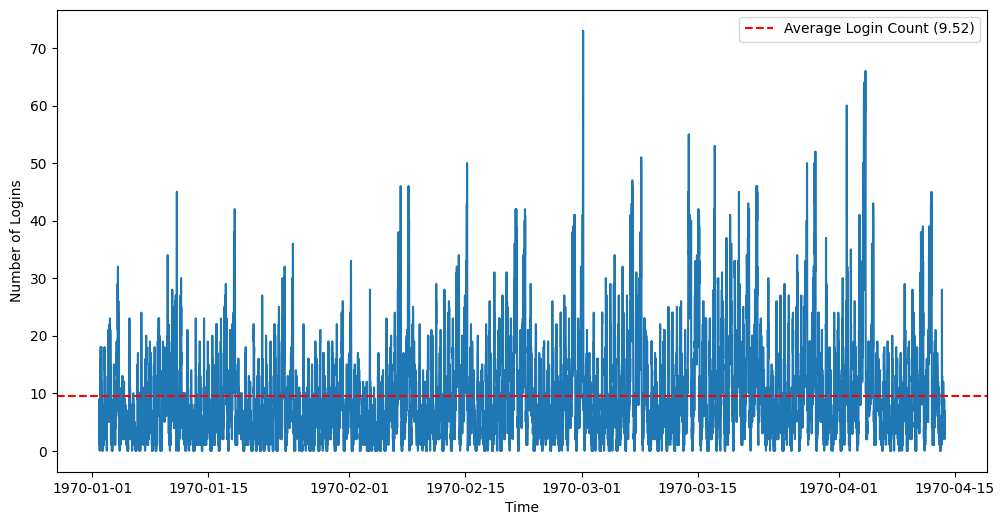

In [14]:
plt.figure(figsize=(12,6))
sns.lineplot(x=logins_resampled.index, y='login_count', data=logins_resampled)
plt.axhline(y=average_login_count, color='red', linestyle ='--',label=f'Average Login Count ({average_login_count:.2f})')
plt.xlabel('Time')
plt.ylabel('Number of Logins')
plt.legend()
plt.show()

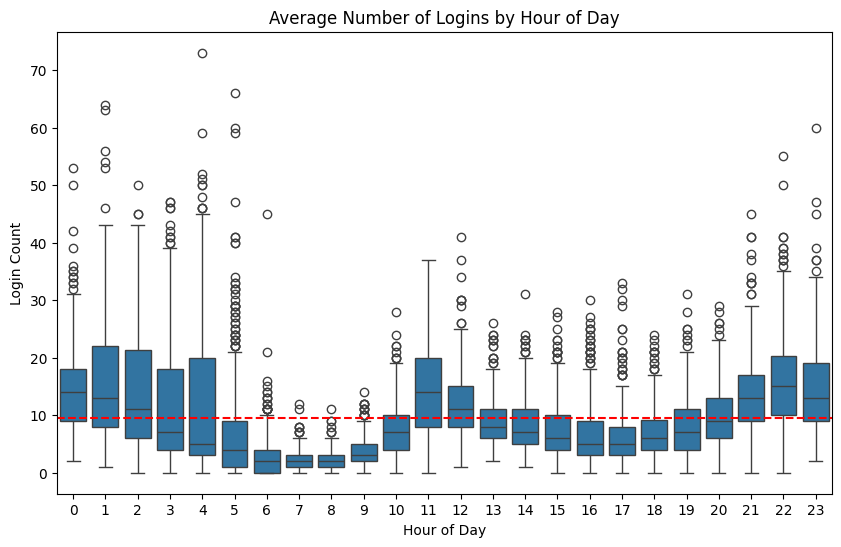

In [53]:
#'logins_resampled' DataFrame has a datetime index
logins_resampled['hour'] = logins_resampled.index.hour

# Average number of logins by hour of the day
plt.figure(figsize=(10,6))
sns.boxplot(x='hour',y='login_count',data=logins_resampled)
plt.title('Average Number of Logins by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Login Count')
plt.axhline(y=average_login_count,color='red',linestyle='--',label=f'Average Login Count ({average_login_count:.2f})')
plt.show()

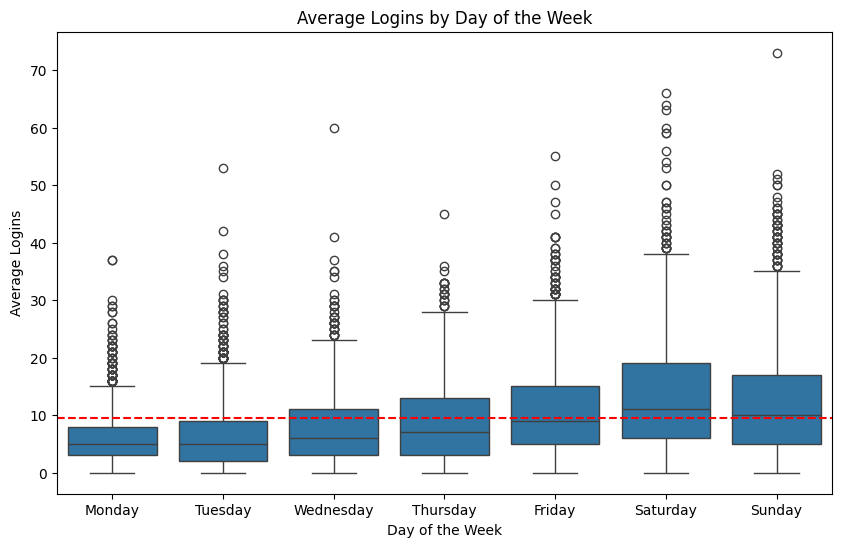

In [16]:
#Average Logins by Day of the Week

# Extract the day of the week from the index
logins_resampled['day_of_week'] = logins_resampled.index.dayofweek
logins_resampled['hour']=logins_resampled.index.hour
# Group by day of the week and calculate the average number of logins
daily_avg = logins_resampled.groupby('day_of_week')['login_count'].mean()

# Plot the average logins by day of the week
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='login_count',data= logins_resampled)
plt.title('Average Logins by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Logins')
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.axhline(y=average_login_count, color='red', linestyle='--')
plt.show()

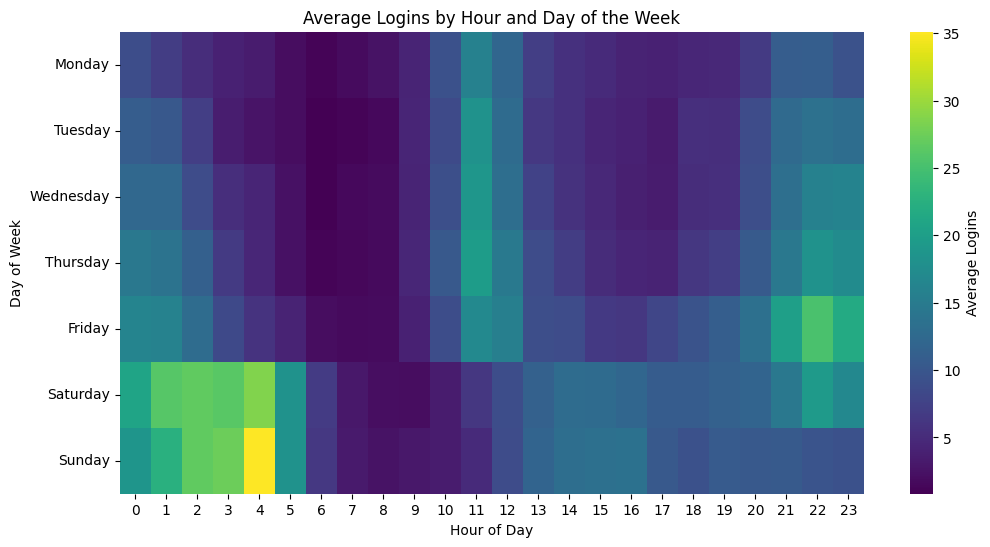

In [17]:
#Extract day of the week and hour for each login entry
logins_resampled['day_of_week'] = logins_resampled.index.dayofweek
logins_resampled['hour'] = logins_resampled.index.hour

# Group by day of the week and hour
heatmap_data = logins_resampled.groupby(['day_of_week', 'hour'])['login_count'].mean().unstack()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=False, fmt=".1f", cbar_kws={'label': 'Average Logins'})
plt.title('Average Logins by Hour and Day of the Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')

# Set labels
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.yticks(ticks=np.arange(len(days)) + 0.5, labels=days, rotation=0)

plt.show()

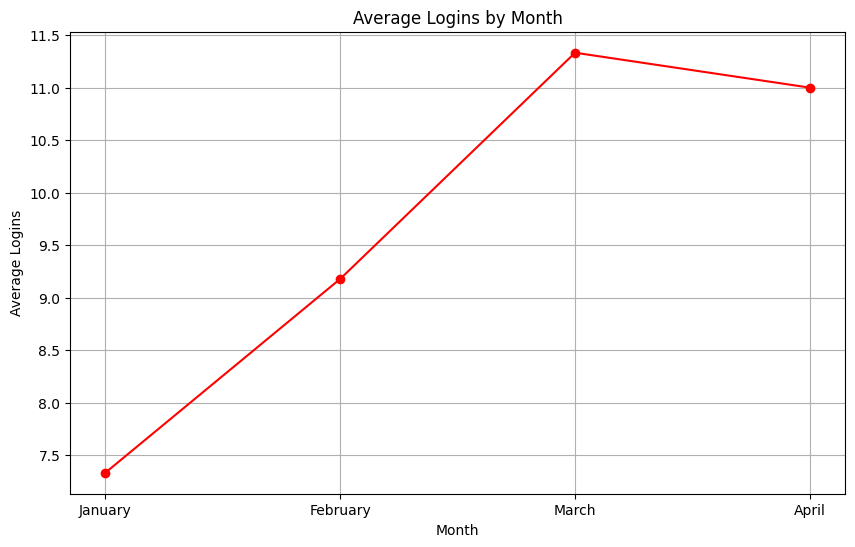

In [18]:
#Average Logins by Month

# Extract the month from the index
logins_resampled['month'] = logins_resampled.index.month

# Group by month and calculate the average number of logins
monthly_avg = logins_resampled.groupby('month')['login_count'].mean()

# Plot the average logins by month
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg, marker='o', linestyle='-', color='r')
plt.title('Average Logins by Month')
plt.xlabel('Month')
plt.ylabel('Average Logins')
plt.grid(True)


# Set custom month labels
months = ['January', 'February', 'March', 'April']
plt.xticks(ticks=range(1, 5), labels=months)

plt.show()

## Findings:

The analysis revealed an average login count of 9.52 over the four-month span, with a steady increase in average monthly logins over time. Daily login averages were similar, with an average of 10 logins per day. Saturdays and Sundays emerged as the days with the highest login counts. A heatmap and box plot were created to highlight the time-of-day patterns for logins. The data shows peak activity from midnight to 4:00 am on weekends, likely indicating late-night demand. Another consistent peak occurred around 11:00 am, suggesting a possible lunch-hour surge. These insights point to both weekend and midday times as high-demand periods for logins.

## Part 2: Experiment & Metrics Design

The goal of Part 2 is to design an experiment that measures the success of reimbursing toll costs for driver partners between Gotham and Metropolis.

The primary measure of success would be the increase in the number of cross-city trips made by drivers. This metric is directly related to the goal of encouraging drivers to serve both cities, as more cross-city trips would indicate that drivers are taking advantage of the toll reimbursement.


**Metrics:**

The purpose of the toll reimbursement is to reduce friction (i.e., the cost of crossing the toll bridge), so the most important outcome is whether or not drivers respond by increasing their cross-city trips.

The number of cross-city trips can be easily tracked through ride data and matched to toll bridge crossing records.

We can measure the number of cross-city trips before and after the toll reimbursement programe starts, as well as compare cross-city trip patterns between drivers who receive reimbursement and those who do not.


We'll use an A/B test to compare drivers who receive toll reimbursements (the experimental group) against drivers who do not (the control group).

**Randomization:**


-Driver segmentation: Randomly assign drivers into two groups

-Group A (Experimental): Drivers who receive toll reimbursement for cross-city trips.

-Group B (Control): Drivers who do not receive toll reimbursement.

-Random assignment ensures that the two groups are comparable and that any differences in the number of cross-city trips can be attributed to the reimbursement policy rather than other factors.

-For both groups, track the number of cross-city trips before and during the experiment.
    
**Track additional variables such as:**

-Number of trips within each city

-Time of day and day of the week (since demand patterns differ)

-Number of trips during weekdays vs. weekends


**Hypothesis Testing:**

-Null Hypothesis (H0): Toll reimbursement does not affect the number of cross-city trips (i.e., there is no difference between Group A and Group B)

-Alternative Hypothesis (H1): Toll reimbursement increases the number of cross-city trips (i.e., Group A has more cross-city trips than Group B)

We can use a two-sample t-test to compare the mean number of cross-city trips between the two groups. This will help us determine if there is a statistically significant difference between the groups.

**Test Assumptions:**


The t-test assumes normality in the distribution of cross-city trips. If the data is not normally distributed, we can apply a non-parametric test.

The test also assumes homogeneity of variance between the two groups.

**Effect Size:**

In addition to statistical significance, we should calculate the effect size to determine how large the impact of the toll reimbursement is. A significant p-value might indicate a difference, but the effect size will tell us if that difference is practically meaningful.
Interpretation of Results and Recommendations

**Significant Increase in Cross-City Trips:**

-If the t-test shows a statistically significant increase in cross-city trips for the experimental group (Group A) compared to the control group (Group B), we can conclude that toll reimbursement is effective.

-Recommendation:
Expand the toll reimbursement program to all drivers in both cities to encourage cross-city rides and improve overall availability of driver partners.

**No Significant Difference:**

-If there is no significant difference between the two groups, we can conclude that toll reimbursement does not have a measurable impact on cross-city trips.

-Recommendation:
The toll reimbursement policy may not be sufficient to incentivize drivers to travel between the cities. Additional incentives (e.g., financial bonuses for cross-city trips, enhanced route optimization) could be tested in further experiments.
Caveats:

**External factors:**

-Traffic conditions, road closures, or special events could impact the results by affecting travel between cities during the experiment period.

-Seasonality: Certain times of the year (e.g., holidays or tourist seasons) may see higher-than-normal cross-city travel, potentially biasing the results.

-Driver behavior: Some drivers may be less willing to cross cities due to personal preferences, which toll reimbursement alone might not overcome. Future experiments could investigate the reasons behind this reluctance.


#Part 3: Predictive Modeling for Driver Retention

Cleaning & EDA of Ultimate Data Challenge JSON

In [19]:
ultimate ='/content/drive/MyDrive/ultimate_challenge/ultimate_data_challenge.json'

df_ultimate = pd.read_json(ultimate)

df_ultimate.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [20]:
print(df_ultimate.dtypes)

print(df_ultimate.info())

print(df_ultimate.columns)

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  

**Missing values are founding in the following columns:**

ave_rating_of_driver

phone number

avg_rating_by_driver

**The following columns will need to be converted to date time:**

signup_date

last_trip_date


In [21]:
# Check if 'phone' column exists in the DataFrame
if 'phone' in df_ultimate.columns:
    # Impute 'phone' with 'Unknown' if it exists
    df_ultimate['phone'].fillna('Unknown', inplace=True)
else:
    # Print a message or handle the case where 'phone' column is missing
    print("Column 'phone' not found in the DataFrame.")

# Impute avg_rating_of_driver with median
df_ultimate['avg_rating_of_driver'].fillna(df_ultimate['avg_rating_of_driver'].median(), inplace=True)
# Impute avg_rating_by_driver with median
df_ultimate['avg_rating_by_driver'].fillna(df_ultimate['avg_rating_by_driver'].median(), inplace=True)

In [22]:
df_ultimate['signup_date'] = pd.to_datetime(df_ultimate['signup_date'])
df_ultimate['last_trip_date'] = pd.to_datetime(df_ultimate['last_trip_date'])

In [23]:
# Checking for dupliactes
duplicates = df_ultimate.duplicated().sum()
print("Number of duplicate rows:, {duplicates}")
print(duplicates.sum().sum())

# Dropping duplicate rows
df_ultimate.drop_duplicates(inplace=True)

Number of duplicate rows:, {duplicates}
8


In [24]:
# Categorical Variables to be Standardized

df_ultimate['city'] = df_ultimate['city'].str.strip().str.lower()
df_ultimate['phone'] = df_ultimate['phone'].str.strip().str.lower()

# Checking for unique values in Categorical Variables
print(df_ultimate['city'].unique())
print(df_ultimate['phone'].unique())

["king's landing" 'astapor' 'winterfell']
['iphone' 'android' 'unknown']


In [25]:
df_ultimate['city'] = df_ultimate['city'].astype('category')
df_ultimate['phone'] = df_ultimate['phone'].astype('category')

In [26]:
# Checking to see result of cleaned data
print(df_ultimate.info())


<class 'pandas.core.frame.DataFrame'>
Index: 49992 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49992 non-null  category      
 1   trips_in_first_30_days  49992 non-null  int64         
 2   signup_date             49992 non-null  datetime64[ns]
 3   avg_rating_of_driver    49992 non-null  float64       
 4   avg_surge               49992 non-null  float64       
 5   last_trip_date          49992 non-null  datetime64[ns]
 6   phone                   49992 non-null  category      
 7   surge_pct               49992 non-null  float64       
 8   ultimate_black_user     49992 non-null  bool          
 9   weekday_pct             49992 non-null  float64       
 10  avg_dist                49992 non-null  float64       
 11  avg_rating_by_driver    49992 non-null  float64       
dtypes: bool(1), category(2), datetime64[ns](2), float64

The Ultimate DataFrame has been cleaned by:



*   Assessing and handling missing values
*   Converting appropriate columns to dt



*   Checking for duplicates
*   Dropping duplicate values (total of 8)


*   Standardizing unique string values
*   Converting unique string values to objects





**Visualization**

([<matplotlib.axis.XTick at 0x7c04fdcfcbb0>,
 [Text(0, 0, 'Not Ultimate Black'), Text(1, 0, 'Ultimate Black')])

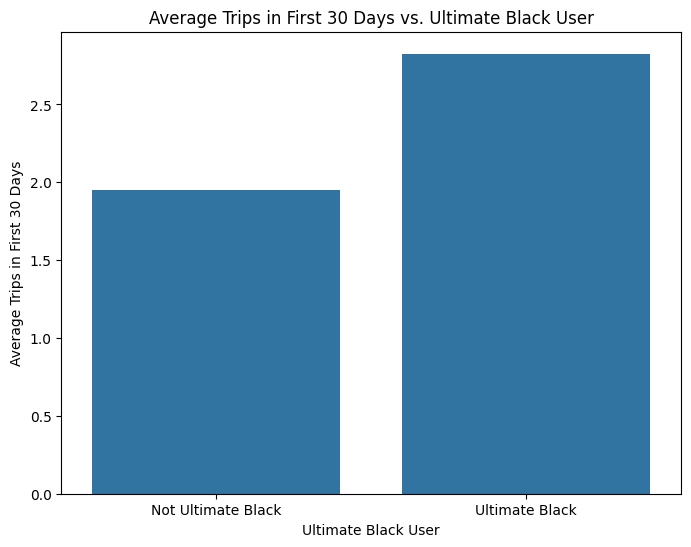

In [27]:
# Trips in 30 days vs Ultimate Black User
# average trips for each group
avg_trips = df_ultimate.groupby('ultimate_black_user')['trips_in_first_30_days'].mean().reset_index()

#  bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='ultimate_black_user', y='trips_in_first_30_days', data=avg_trips)

plt.title('Average Trips in First 30 Days vs. Ultimate Black User')
plt.xlabel('Ultimate Black User')
plt.ylabel('Average Trips in First 30 Days')
plt.xticks([0, 1], ['Not Ultimate Black', 'Ultimate Black'])


Ultimate Black users had an average of 2.7 trips in first 30 days of sign-up vs an average of 2.0 trips in those who were not Ultimate Black users.

This suggests that Ultimate Black users are inititially slightly more engaged and could convey that they are more likely to retain their membership.


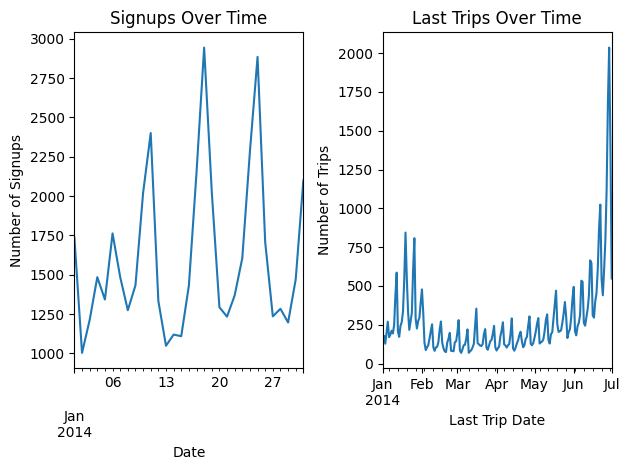

In [28]:



plt.subplot(1,2,1)
df_ultimate['signup_date'].value_counts().sort_index().plot()
plt.title("Signups Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Signups")

plt.subplot(1,2,2)
df_ultimate['last_trip_date'].value_counts().sort_index().plot()
plt.title("Last Trips Over Time")
plt.xlabel("Last Trip Date")
plt.ylabel("Number of Trips")

plt.tight_layout()
plt.show()

User sign-up oscillated with peaks and valleys during the month of January 2014. At the beginning of January they started with 1000 signups and peaked to about 3000 signups in the middle of the month. At the end of the month there were about 2000 signups.

The mean number of sign ups was 1612 over the span of the month.


Overall there is a large jump from 250 trips in January with an upward trend to 2000 in July suggesting that overtime user usage increased.



In [29]:
# Discovering percentage of active users

last_date = df_ultimate['last_trip_date'].max()

# Calculate the date 30 days ago
thirty_days_ago = last_date - pd.Timedelta(days=30)

retained_users = df_ultimate[df_ultimate['last_trip_date'] >= thirty_days_ago]

retention_rate = len(retained_users) / len(df_ultimate) * 100

print(f"Retention Rate: {retention_rate:.2f}%")

Retention Rate: 37.61%


In [30]:
# Calculate the date 30 days before the last date
thirty_days_ago = df_ultimate['last_trip_date'].max() - pd.Timedelta(days=30)

# Create the 'retained' column based on the condition
df_ultimate['retained'] = (df_ultimate['last_trip_date'] >= thirty_days_ago).astype(int)

# Print the updated DataFrame to verify
print(df_ultimate[['last_trip_date', 'retained']].head())





  last_trip_date  retained
0     2014-06-17         1
1     2014-05-05         0
2     2014-01-07         0
3     2014-06-29         1
4     2014-03-15         0


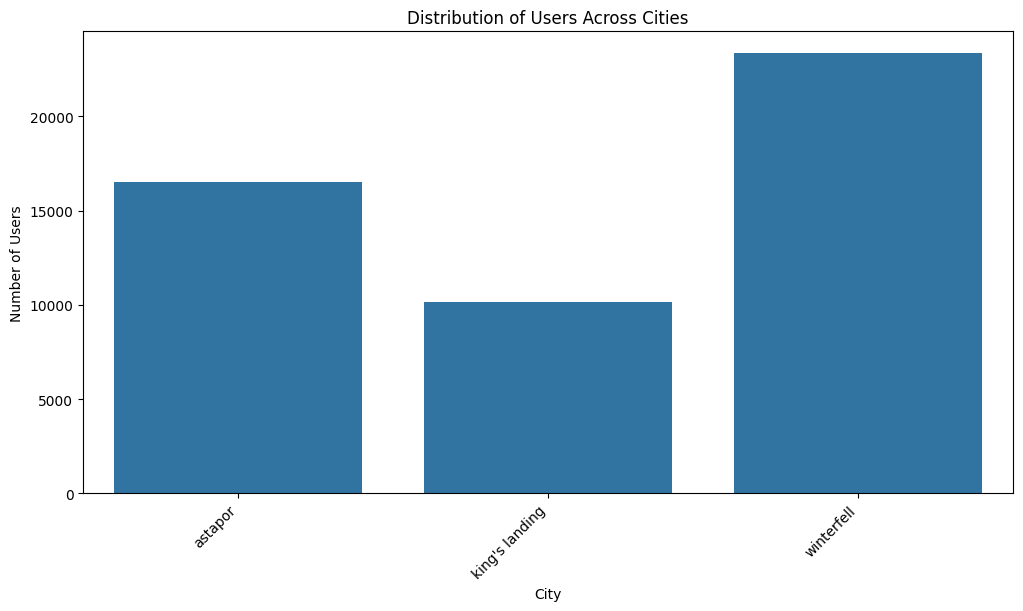

In [31]:
# City Distribution
# occurrences of each city
city_counts = df_ultimate['city'].value_counts()

# bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=city_counts.index, y=city_counts.values)

plt.title('Distribution of Users Across Cities')
plt.xlabel('City')
plt.ylabel('Number of Users')
plt.xticks(rotation=45, ha='right')

plt.show()

The predominent number of users reside in Winterfell.

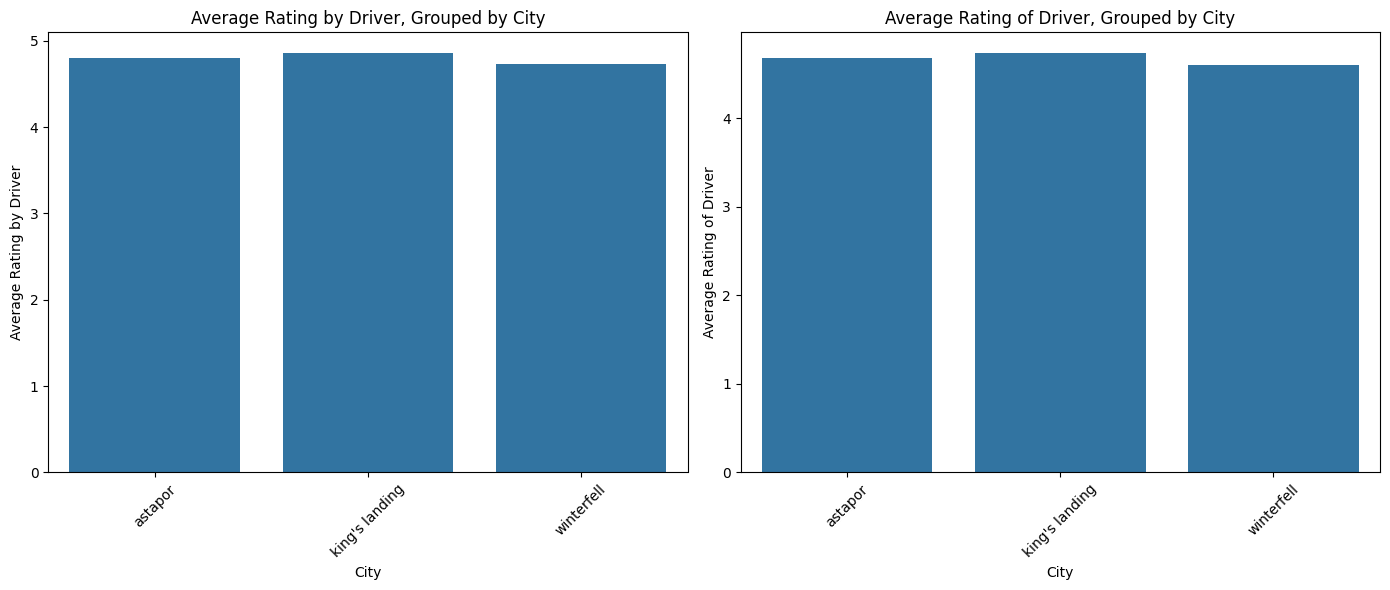

In [32]:
# Distribution Average Ratings by City
# Group data by city and calculate average ratings
city_ratings = df_ultimate.groupby('city')[['avg_rating_by_driver', 'avg_rating_of_driver']].mean().reset_index()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#  Average rating by driver
sns.barplot(x='city', y='avg_rating_by_driver', data=city_ratings, ax=axes[0])
axes[0].set_title('Average Rating by Driver, Grouped by City')
axes[0].set_xlabel('City')
axes[0].set_ylabel('Average Rating by Driver')
axes[0].tick_params(axis='x', rotation=45)

#  Average rating of driver
sns.barplot(x='city', y='avg_rating_of_driver', data=city_ratings, ax=axes[1])
axes[1].set_title('Average Rating of Driver, Grouped by City')
axes[1].set_xlabel('City')
axes[1].set_ylabel('Average Rating of Driver')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



Ratings of drivers and of overall rides tends to remain high around 4 across all cities. Consistently high ratings could suggest why user engagment increased overtime.

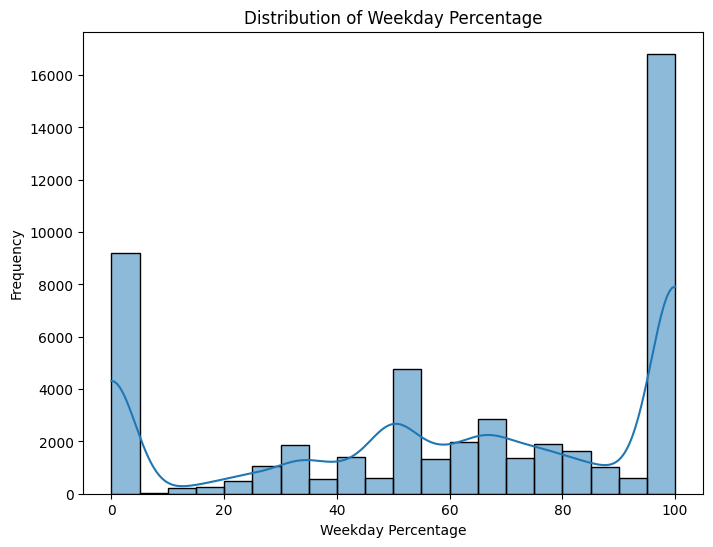

In [33]:
# Weekday Percentage Distribution

# histogram
plt.figure(figsize=(8, 6))
sns.histplot(df_ultimate['weekday_pct'], bins=20, kde=True)  # Adjust bins and kde as needed

plt.title('Distribution of Weekday Percentage')
plt.xlabel('Weekday Percentage')
plt.ylabel('Frequency')

plt.show()


There is an uneven distribution of weekday percentage with 0% and 100% having the highest frequency. Thus,  highlighting two primary user behaviors: weekday exclusive and weekend exclusive usage. Understanding these behaviors can lead to nuanced approaches in marketing campaigns to better meet the needs of each user group.

In [34]:
# frequency by phone category
trip_frequency_by_phone = df_ultimate.groupby('phone')['trips_in_first_30_days'].sum()

print("Trip Frequency by Phone Category:")
print(trip_frequency_by_phone)


# average distance by phone category
avg_distance_by_phone = df_ultimate.groupby('phone')['avg_dist'].mean()


print("Average Distance by Phone Category:")
print(avg_distance_by_phone)


Trip Frequency by Phone Category:
phone
android    29063
iphone     83890
unknown      949
Name: trips_in_first_30_days, dtype: int64
Average Distance by Phone Category:
phone
android    5.979561
iphone     5.701722
unknown    7.225859
Name: avg_dist, dtype: float64


Users who use iphones tend to use Ultimate more than other users with other phone carriers. However of those who signed up in the first 30 days, android and iphone users travelled the same average distance (~6 miles).

Therefore, iphone users may be more likely to retain ultimate membership versus other phone carriers since they tend to have a higher frequency of trips overall.

### **K-Means: for feature extraction**

         trips_in_first_30_days  avg_rating_of_driver  avg_surge  surge_pct  \
cluster                                                                       
0                      1.820240              2.928165   1.091424   9.372796   
1                      1.337738              4.794906   1.105169  12.312127   
2                      1.588906              4.777437   1.059236   6.803583   
3                      0.863378              4.843442   1.025481   3.167743   
4                      2.209125              4.706398   1.077429   9.583805   
5                     15.952562              4.600569   1.069502   8.924526   

         weekday_pct   avg_dist  avg_rating_by_driver  retained  
cluster                                                          
0          58.851527   5.146597              4.654889  0.324185  
1          16.315752   4.657315              4.784508  0.000000  
2          91.885036   4.299592              4.794247  0.000000  
3          83.341941  19.494065      

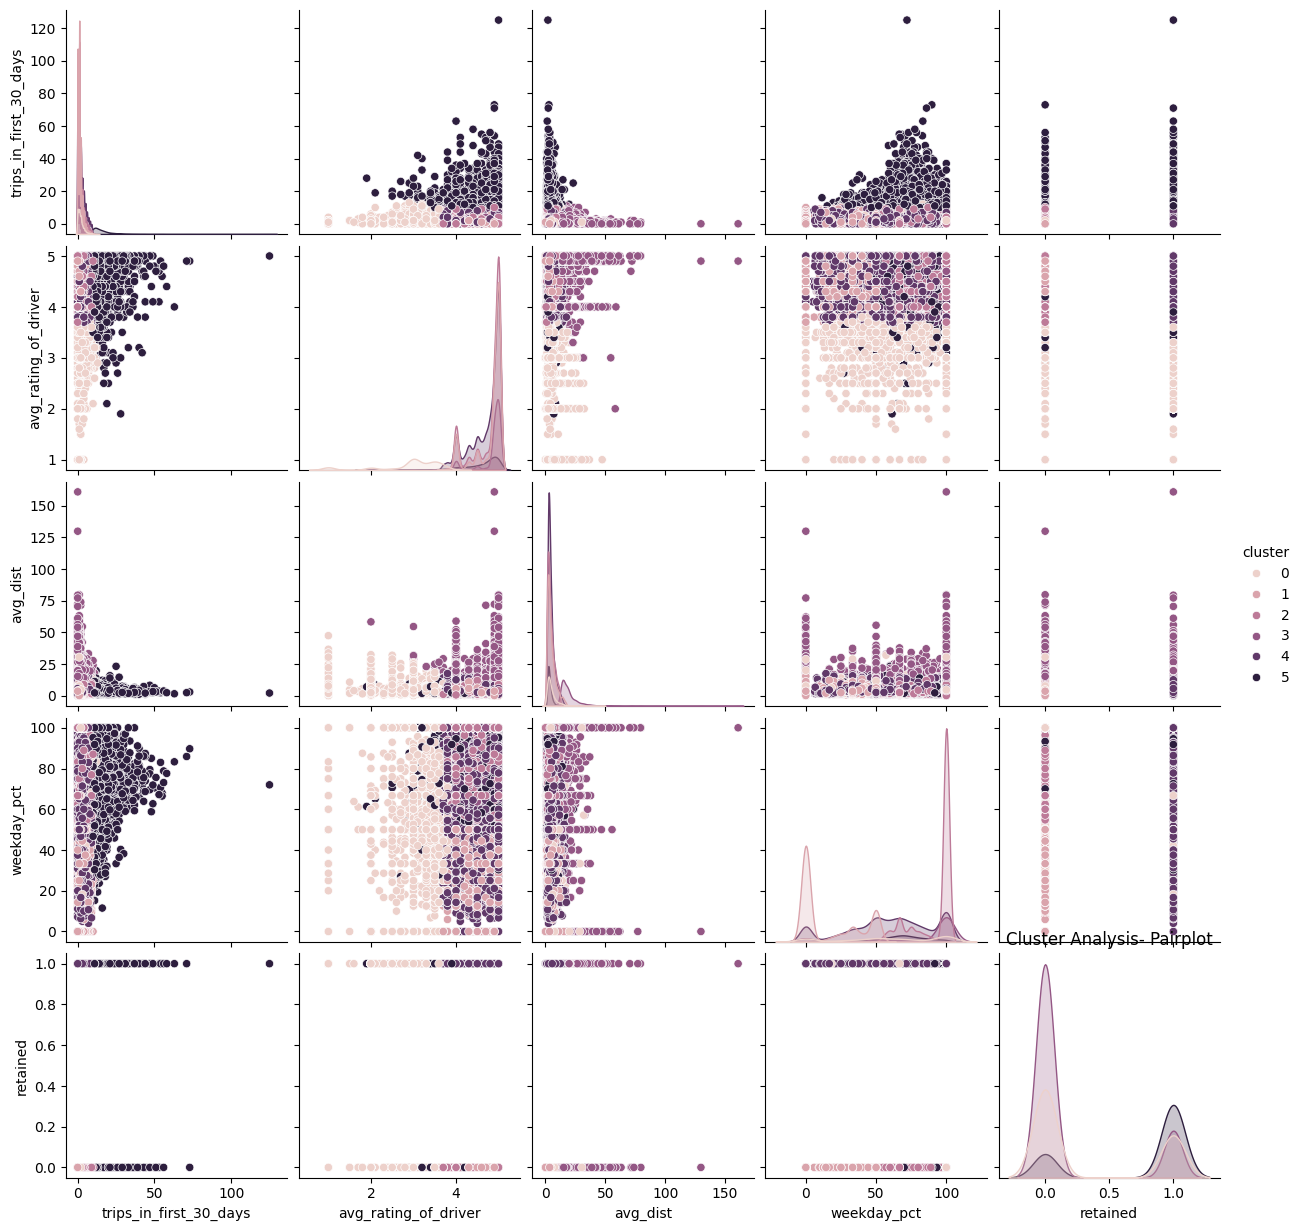

In [35]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = ['trips_in_first_30_days', 'avg_rating_of_driver',
                            'avg_dist', 'weekday_pct', 'retained']
X = df_ultimate[features]

# StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# KMeans clustering
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)
df_ultimate['cluster'] = cluster_labels


numerical_features = df_ultimate.select_dtypes(include=['number'])
cluster_analysis = numerical_features.groupby('cluster').mean()
print(cluster_analysis)



sns.pairplot(df_ultimate, hue='cluster', vars=['trips_in_first_30_days',
'avg_rating_of_driver','avg_dist','weekday_pct','retained'])

plt.title('Cluster Analysis- Pairplot')
plt.show()








## Summary



Cluster 0:

These users are relatively new, taking an average of 1.82 trips in their first 30 days. However, their average driver rating of 2.93 suggests some initial dissatisfaction with driver experiences. While 9.37% of their trips involve surge pricing, they experience a relatively low average surge multiplier of 1.09. This group might benefit from targeted onboarding.

Cluster 1:

This cluster represents frequent and loyal users, averaging 1.34 trips in their first 30 days and consistently giving high driver ratings (4.79 on average). They are comfortable with surge pricing, with 12.31% of their trips involving surges and an average surge multiplier of 1.11. This group is likely the most valuable customer segment and should be nurtured with loyalty programs and premium features.


Cluster 2:

This group gave an average rating of 4.78 and took 1.59 in the first 30 days. However, they are more price-conscious, with only 6.80% of their trips involving surge pricing and experiencing a lower average surge multiplier of 1.06. They represent a valuable segment that can be retained through promotions and incentives.


Cluster 3:

These users are infrequent riders, averaging only 0.86 trips in their first 30 days. Despite this, they consistently provide high driver ratings (4.84 on average). They are highly price-sensitive, with only 3.17% of their trips involving surge pricing and experiencing the lowest average surge multiplier of 1.03




Cluster 4:

Low average trips (0.89) in the first 30 days, high average driver rating (4.84), lowest average surge (1.03), and the lowest surge percentage (3.17%). This cluster could represent infrequent users who are price-sensitive and avoid surge pricing.

Clusters 5 & 6  were difficult to interpret

In [36]:

print(df_ultimate.columns)
print(df_ultimate.info)


Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'retained', 'cluster'],
      dtype='object')
<bound method DataFrame.info of                  city  trips_in_first_30_days signup_date  \
0      king's landing                       4  2014-01-25   
1             astapor                       0  2014-01-29   
2             astapor                       3  2014-01-06   
3      king's landing                       9  2014-01-10   
4          winterfell                      14  2014-01-27   
...               ...                     ...         ...   
49995  king's landing                       0  2014-01-25   
49996         astapor                       1  2014-01-24   
49997      winterfell                       0  2014-01-31   
49998         astapor                       2  2014-01-14   
49999         astapor  

## Modeling


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
df_ultimate['cluster'] = pd.to_numeric(df_ultimate['cluster'])
# features vs target variable
features = ['trips_in_first_30_days','avg_surge', 'surge_pct', 'cluster']
target = 'retained'

X = df_ultimate[features]
y = df_ultimate[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")
print(f"Confusion Matrix:\n{conf_matrix}")

Random Forest Accuracy: 0.9550955095509551
Precision: 0.965526827912149
Recall: 0.9144286466561348
F1 Score: 0.9392832995267072
ROC AUC: 0.9472159359711896
Confusion Matrix:
[[6077  124]
 [ 325 3473]]


In [44]:
# cross-validation
scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')


print("Cross-validation scores:", scores)
print("Average accuracy:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation scores: [0.9539954  0.95229523 0.9579916  0.9529906  0.95759152]
Average accuracy: 0.9549728687611709
Standard deviation: 0.0023674732707473184


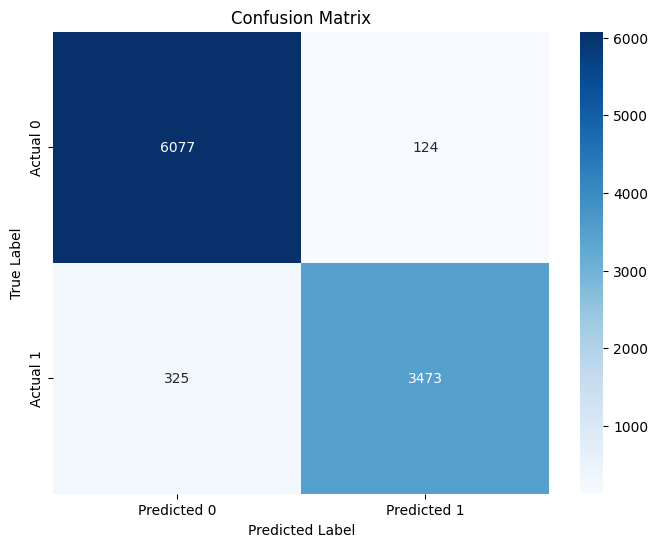

In [46]:
conf_matrix = np.array([[6077, 124], [325, 3473]])


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

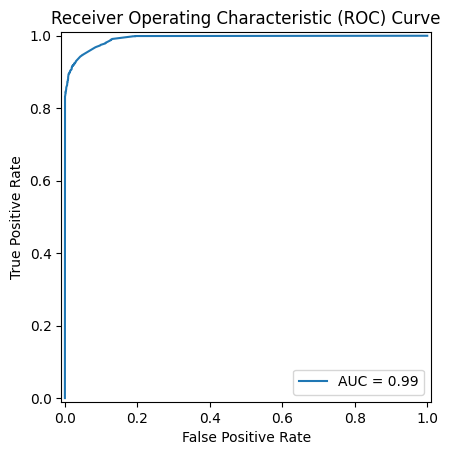

In [52]:
from sklearn.metrics import RocCurveDisplay, auc, roc_curve

# Get predicted probabilities for class 1 ie RETAINED USERS
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve (already know value from above)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

#  plot the ROC curve
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()








# Conclusion


This segment of the project focused on preparing and analyzing the Ultimate dataset to understand user behavior and identify potential customer segments. The initial data cleaning involved addressing missing values, converting data types, and removing duplicate entries, ensuring data integrity for subsequent analysis. Further data refinement involved standardizing and converting categorical variables to ensure consistency. A key finding was that only 37% of users were classified as "active," prompting the creation of a new binary feature to represent user activity. The primary analysis investigated relationships between user frequency, retention, phone carrier, and participation in the Ultimate Black program. To uncover underlying patterns and group similar users, K-means clustering was implemented, revealing distinct customer segments with varying characteristics. These segments, characterized by their usage patterns, driver ratings, and responses to surge pricing, offer valuable insights for tailoring marketing strategies and optimizing user experiences. This also played a large role in how I chose my features during the training of my model.

 To predict user retention, a Random Forest model was built using scaled features and dummy variables for categorical features. Employing an 80/20 train-test split, the model achieved an impressive accuracy of 95.5%, with a precision of 96.6%, recall of 91.4%, F1-score of 93.9%, and ROC AUC of 0.947. Cross-validation further confirmed the model's robustness and generalizability. These results demonstrate the potential for accurately predicting user retention based on the identified features and using machine learning techniques.

 Further investigation into these segments and their specific needs, coupled with the predictive power of the Random Forest model, will guide subsequent phases of the project, focusing on actionable strategies to enhance user engagement and retention.